# **imports necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
import warnings


warnings.filterwarnings('ignore')

# **Reading and PREPROCESSING**

In [2]:
df = pd.read_csv(r"C:\Users\salma elbadry\Desktop\LEVEL 4\lvl4_s2\Deep learning\project\sqli.csv", encoding='utf-16')
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (4200, 2)


,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
5,?,1
6,' and 1 = 0 ) union all,1
7,? or 1 = 1 --,1
8,x' and userid is NULL; --,1
9,x' and email is NULL; --,1


In [3]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(4200,) (4200,)
Dataset Input: 
 0                  a
1                a' 
2              a' --
3    a' or 1 = 1; --
4                  @
Name: Sentence, dtype: object
Dataset Label: 
 0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64


In [4]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to C:\Users\salma
[nltk_data]     elbadry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3360, 4717)
(3360,)
(840, 4717)
(840,)


# **Covolutional NEURAL NETWORK (CNN)**

In [6]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,4717)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             150976    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 152065 (594.00 KB)
Trainable params: 152065 (594.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

X_train1 = X_train.reshape(-1, 1, 4717)
X_test1 = X_test.reshape(-1, 1, 4717)

history = model.fit(X_train1, y_train, epochs=10, validation_data=(X_test1, y_test), callbacks=[early_stopping])


Epoch 1/10


105/105 [==============================] - 1s 6ms/step - loss: 0.4276 - accuracy: 0.7964 - val_loss: 0.2167 - val_accuracy: 0.9071
Epoch 2/10
105/105 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9565 - val_loss: 0.0973 - val_accuracy: 0.9774
Epoch 3/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0694 - accuracy: 0.9807 - val_loss: 0.0823 - val_accuracy: 0.9667
Epoch 4/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9821 - val_loss: 0.0783 - val_accuracy: 0.9643
Epoch 5/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0486 - accuracy: 0.9821 - val_loss: 0.0747 - val_accuracy: 0.9667
Epoch 6/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9827 - val_loss: 0.0712 - val_accuracy: 0.9679
Epoch 7/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9827 - val_loss: 0.0720 - val_accuracy: 0.9679
Epo

In [8]:
y_pred = model.predict(X_test1)
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")


27/27 [==============================] - 0s 1ms/step
Accuracy of CNN on test set : 0.9678571428571429
F1 Score of CNN on test set : 0.9406593406593408


# Visualization

In [9]:
#plot_model(model, show_shapes=True, to_file='CNN.png')

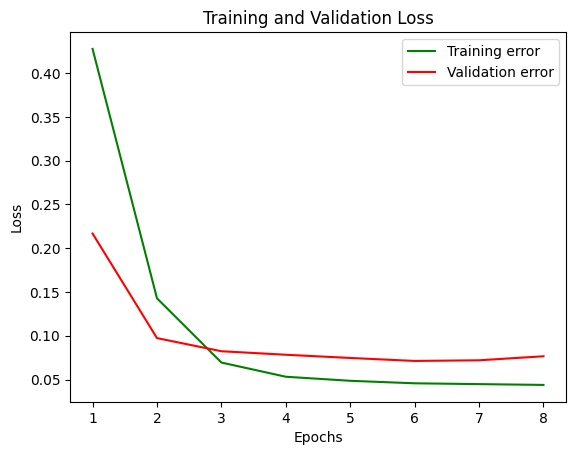

In [10]:
history_dict = history.history
train_loss = history_dict['loss']    # Training loss over epochs
val_loss = history_dict['val_loss']    # Validation loss over epochs
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_loss,'g', label='Training error')
plt.plot(epochs, val_loss,'b', color="red", label='Validation error')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

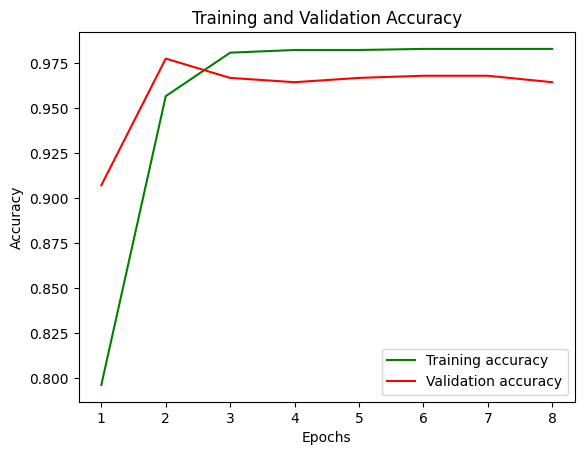

In [11]:
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'g', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="red", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

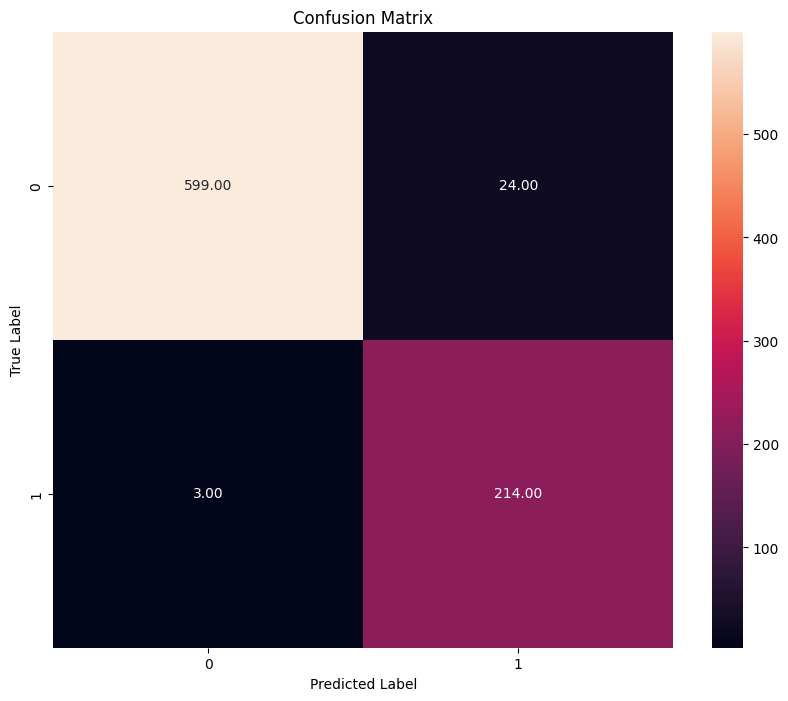

               precision    recall  f1-score   support

Non-Injection       1.00      0.96      0.98       623
    Injection       0.90      0.99      0.94       217

     accuracy                           0.97       840
    macro avg       0.95      0.97      0.96       840
 weighted avg       0.97      0.97      0.97       840



In [12]:
# Plots confusion matrix and displays classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_model, annot=True, fmt='.2f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=["Non-Injection", "Injection"]))

# Define the RNN model

In [13]:
from tensorflow import keras
model = keras.Sequential()
model.add(layers.Embedding(input_dim=4717, output_dim=128, input_length=1))  # Assuming 4717 is the size of your vocabulary
model.add(layers.LSTM(128))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 128)            603776    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 735489 (2.81 MB)
Trainable params: 735489 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [17]:
# Train the model
history = model.fit(X_train1, y_train, epochs=10, validation_data=(X_test1, y_test), callbacks=[early_stopping])

Epoch 1/10


TypeError: in user code:

    File "C:\Users\salma elbadry\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\salma elbadry\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\salma elbadry\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\salma elbadry\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\salma elbadry\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\salma elbadry\anaconda3\lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=True
      • initial_state=None


In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(f"Accuracy of RNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of RNN on test set : {f1_score(y_pred, y_test)}")

In [ ]:
# Plot training and validation loss
history_dict = history.history
train_loss = history_dict['loss']    # Training loss over epochs
val_loss = history_dict['val_loss']    # Validation loss over epochs
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_loss,'g', label='Training error')
plt.plot(epochs, val_loss,'b', color="red", label='Validation error')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot training and validation loss
history_dict = history.history
train_loss = history_dict['loss']    # Training loss over epochs
val_loss = history_dict['val_loss']    # Validation loss over epochs
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_loss,'g', label='Training error')
plt.plot(epochs, val_loss,'b', color="red", label='Validation error')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Confusion matrix and classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_model, annot=True, fmt='.2f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=["Non-Injection", "Injection"]))

In [ ]:
# Define the FNN model
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(1, 4717)))  # Flatten the input
model.add(layers.Dense(128, activation='relu'))  # Hidden layer 1
model.add(layers.Dense(64, activation='relu'))   # Hidden layer 2 (optional)
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer
model.summary()


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(f"Accuracy of FNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of FNN on test set : {f1_score(y_pred, y_test)}")

In [ ]:
# Plot training and validation loss
history_dict = history.history
train_loss = history_dict['loss']    # Training loss over epochs
val_loss = history_dict['val_loss']    # Validation loss over epochs
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_loss,'g', label='Training error')
plt.plot(epochs, val_loss,'b', color="red", label='Validation error')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot training and validation accuracy
train_acc = history_dict['accuracy']  # Training accuracy over epochs
val_acc = history_dict['val_accuracy']  # Validation accuracy over epochs
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Confusion matrix and classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_model, annot=True, fmt='.2f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=["Non-Injection", "Injection"]))


In [ ]:
# Define the Deep Belief Network (DBN) model 
# We'll use a stack of Restricted Boltzmann Machines (RBMs) for the DBN
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
def create_rbm(input_dim, num_hidden):
    """Creates a Restricted Boltzmann Machine (RBM) layer."""
    input_layer = Input(shape=(input_dim,))
    hidden_layer = Dense(num_hidden, activation='relu', use_bias=False)(input_layer)
    output_layer = Dense(input_dim, activation='sigmoid', use_bias=False)(hidden_layer)
    rbm = Model(inputs=input_layer, outputs=output_layer)
    rbm.compile(optimizer='adam', loss='mse')  # You might need to adjust the loss for your data
    return rbm

In [ ]:
# Define the DBN with stacked RBMs
input_dim = 4717  # Size of your input features
num_hidden1 = 128
num_hidden2 = 64

rbm1 = create_rbm(input_dim, num_hidden1)
rbm2 = create_rbm(num_hidden1, num_hidden2)

In [ ]:
# Train the RBMs individually 
# You'll likely need to adjust the training parameters for your specific data
rbm1.fit(X_train, X_train, epochs=10, batch_size=32)
rbm2.fit(rbm1.predict(X_train), rbm1.predict(X_train), epochs=10, batch_size=32)


In [ ]:
# Construct the DBN by using the pre-trained RBMs for feature extraction 
# Then add a final classification layer
input_layer = Input(shape=(input_dim,))
hidden1 = rbm1(input_layer)
hidden2 = rbm2(hidden1)
output_layer = Dense(1, activation='sigmoid')(hidden2)
dbn = Model(inputs=input_layer, outputs=output_layer)
dbn.summary()

In [ ]:
# Compile and train the DBN (only train the final classification layer)
dbn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dbn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [ ]:
# Evaluate the DBN
y_pred = dbn.predict(X_test)
y_pred = np.round(y_pred)
print(f"Accuracy of DBN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of DBN on test set : {f1_score(y_pred, y_test)}")

In [ ]:
# Plot training and validation loss
history_dict = dbn.history.history # dbn.history.history is the correct attribute
train_loss = history_dict['loss']    # Training loss over epochs
val_loss = history_dict['val_loss']    # Validation loss over epochs
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_loss,'g', label='Training error')
plt.plot(epochs, val_loss,'b', color="red", label='Validation error')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot training and validation accuracy
train_acc = history_dict['accuracy']  # Training accuracy over epochs
val_acc = history_dict['val_accuracy']  # Validation accuracy over epochs
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Confusion matrix and classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_model, annot=True, fmt='.2f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=["Non-Injection", "Injection"]))